# **Data Mining and Data Warehousing Project**
**Topic: Heart Attack Prediction System using Machine Learning Algorithms**

***Step 1: Acquire the Dataset***
- 3 datasets were taken form Kaggle, and combined according to the common features.
- Dataset1: https://www.kaggle.com/datasets/imnikhilanand/heart-attack-prediction/data
- Dataset2: https://www.kaggle.com/datasets/pritsheta/heart-attack/data
- Dataset3: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import imblearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [3]:
# Import the dataset:
dataset = pd.read_csv('/content/heart_attack_dataset.csv')
# print the dataset:
dataset

,Age,Gender,Chest Pain,Rest Blood Pressure,Cholesterol,Fast Blood Sugar,RER,Max Heart Rate,EIA,Oldpeak,Slope,numMajorVessels,Thal,Label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
896,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
897,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
898,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


***Step 2: Data Pre-processing***
- Some Values were **"?"**, so the **rows** that has these values were removed.
- **Object** Type Columns converted to **INT**.
- Null Vlaues has been handled using the **Mean** and the **Mode** of columns.
- Dro column named ***Unnamed: 14***.
- Detect any **Outliers** and replace them with the Median Value.

In [4]:
# Remove '?' - romve rows that has this symbol.
dataset = dataset[dataset['Rest Blood Pressure'] != '?']
dataset = dataset[dataset['Cholesterol'] != '?']
dataset = dataset[dataset['Fast Blood Sugar'] != '?']
dataset = dataset[dataset['RER'] != '?']
dataset = dataset[dataset['Max Heart Rate'] != '?']
dataset = dataset[dataset['EIA'] != '?']
dataset = dataset[dataset['Slope'] != '?']
dataset = dataset[dataset['numMajorVessels'] != '?']
dataset = dataset[dataset['Thal'] != '?']

In [5]:
# Change the type of object to int for specific columns
dataset['Rest Blood Pressure'] = dataset['Rest Blood Pressure'].astype('int')
dataset['Cholesterol'] = dataset['Cholesterol'].astype('int')
dataset['Fast Blood Sugar'] = dataset['Fast Blood Sugar'].astype('int')
dataset['RER'] = dataset['RER'].astype('int')
dataset['Max Heart Rate'] = dataset['Max Heart Rate'].astype('int')
dataset['EIA'] = dataset['EIA'].astype('int')
dataset['Slope'] = dataset['Slope'].astype('int')
dataset['numMajorVessels']= dataset['numMajorVessels'].astype('int')
dataset['Thal'] = dataset['Thal'].astype('int')

# Fill in missing values using the Mean and the Mode
dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)
dataset['Gender'].fillna(dataset['Gender'].mode(), inplace=True)
dataset['Chest Pain'].fillna(dataset['Chest Pain'].mode(), inplace=True)
dataset['Oldpeak'].fillna(dataset['Oldpeak'].mean(), inplace=True)
dataset['Label'].fillna(dataset['Label'].mode(), inplace=True)
dataset['Rest Blood Pressure'].fillna(dataset['Rest Blood Pressure'].mean(), inplace=True)
dataset['Cholesterol'].fillna(dataset['Cholesterol'].mean(), inplace=True)
dataset['Fast Blood Sugar'].fillna(dataset['Fast Blood Sugar'].mode(), inplace=True)
dataset['RER'].fillna(dataset['RER'].mode(), inplace=True)
dataset['Max Heart Rate'].fillna(dataset['Max Heart Rate'].mean(), inplace=True)
dataset['EIA'].fillna(dataset['EIA'].mode(), inplace=True)
dataset['Slope'].fillna(dataset['Slope'].mode(), inplace=True)
dataset['Fast Blood Sugar'].fillna(dataset['Fast Blood Sugar'].mode(), inplace=True)
dataset['numMajorVessels'].fillna(dataset['numMajorVessels'].mode(), inplace=True)
dataset['Thal'].fillna(dataset['Thal'].mode(), inplace=True)

In [ ]:
# Drop a column by specifying the column name Unnamed: 14  and axis
#dataset = dataset.drop('Unnamed: 14', axis=1)

In [6]:
dataset.describe()

,Age,Gender,Chest Pain,Rest Blood Pressure,Cholesterol,Fast Blood Sugar,RER,Max Heart Rate,EIA,Oldpeak,Slope,numMajorVessels,Thal,Label
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,54.354201,0.683690,0.971993,131.654036,246.230643,0.148270,0.527183,149.561779,0.327842,1.040362,1.400329,0.728171,2.321252,0.545305
std,9.072030,0.465419,1.037676,17.525057,51.751687,0.355661,0.525428,22.963216,0.469814,1.159308,0.615691,1.021347,0.640178,0.498354
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,7.000000,1.000000


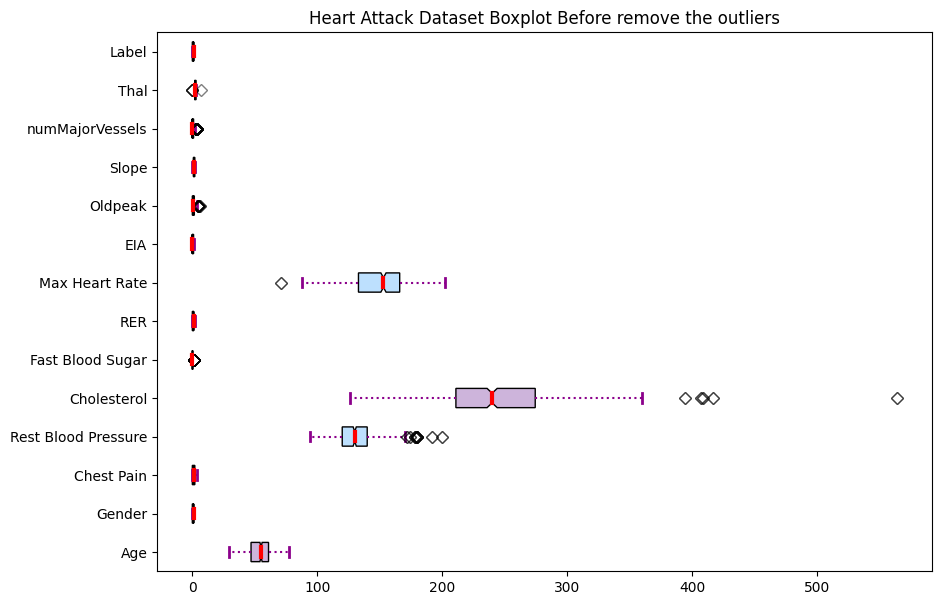

In [7]:
# Draw Box-Plot to check if there is outliers values.
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(dataset, patch_artist = True,
				notch ='True', vert = 0)

colors = ['#cdb4db', '#ffc8dd',
		'#ffafcc', '#bde0fe','#cdb4db', '#ffc8dd',
		'#ffafcc', '#bde0fe','#cdb4db', '#ffc8dd',
		'#ffafcc', '#bde0fe','#ffafcc']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)

# x-axis labels
ax.set_yticklabels(['Age', 'Gender', 'Chest Pain', 'Rest Blood Pressure', 'Cholesterol',
       'Fast Blood Sugar', 'RER', 'Max Heart Rate', 'EIA', 'Oldpeak', 'Slope',
       'numMajorVessels', 'Thal', 'Label'])

# Adding title
plt.title("Heart Attack Dataset Boxplot Before remove the outliers")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()
fig.savefig('Heart_attack_before_outlierRemoval.png')


***`For the above boxplot, we can see that there are outliers in some columns in dataset. Replace Outliers values with the median value of each column that has outlier values.`***

In [8]:
# Replace outliers with the median
# Calculate the z-score
from scipy import stats
z = np.abs(stats.zscore(dataset['Max Heart Rate']))
threshold = 1
dataset.loc[z > threshold, 'Max Heart Rate'] = dataset['Max Heart Rate'].median()

z1 = np.abs(stats.zscore(dataset['Cholesterol']))
dataset.loc[z > threshold, 'Cholesterol'] = dataset['Cholesterol'].median()

z2 = np.abs(stats.zscore(dataset['Rest Blood Pressure']))
dataset.loc[z > threshold, 'Rest Blood Pressure'] = dataset['Rest Blood Pressure'].median()

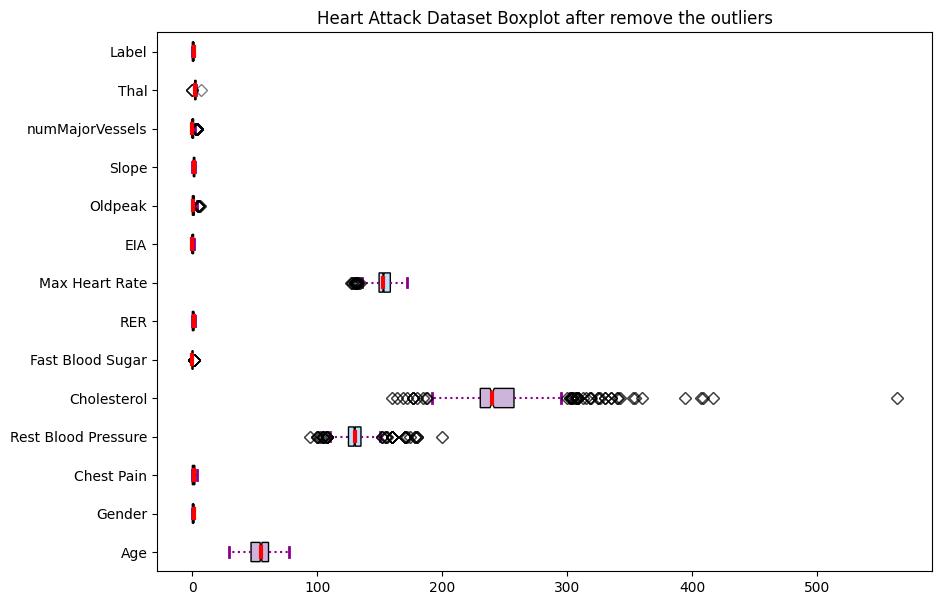

In [9]:
# after remove outlier
# Draw Box-Plot to check if there is outliers values.
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(dataset, patch_artist = True,
				notch ='True', vert = 0)

colors = ['#cdb4db', '#ffc8dd',
		'#ffafcc', '#bde0fe','#cdb4db', '#ffc8dd',
		'#ffafcc', '#bde0fe','#cdb4db', '#ffc8dd',
		'#ffafcc', '#bde0fe','#ffafcc']

for patch, color in zip(bp['boxes'], colors):
	patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
	whisker.set(color ='#8B008B',
				linewidth = 1.5,
				linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
	cap.set(color ='#8B008B',
			linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
	median.set(color ='red',
			linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
	flier.set(marker ='D',
			color ='#e7298a',
			alpha = 0.5)

# x-axis labels
ax.set_yticklabels(['Age', 'Gender', 'Chest Pain', 'Rest Blood Pressure', 'Cholesterol',
       'Fast Blood Sugar', 'RER', 'Max Heart Rate', 'EIA', 'Oldpeak', 'Slope',
       'numMajorVessels', 'Thal', 'Label'])

# Adding title
plt.title("Heart Attack Dataset Boxplot after remove the outliers")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()

# **Check the Imbalance by looking for each colum with specifi attribute each time.**



Text(0.5, 1.0, 'Heart Attack Prediction(Yes > 1, No > 0)')

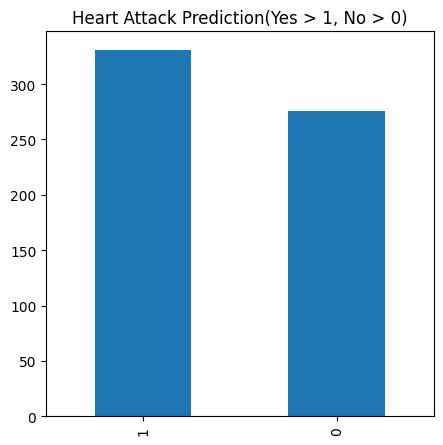

In [11]:
yes_no_hap = dataset['Label'].value_counts()
yes_no_hap.plot(kind='bar',figsize=(5,5))
plt.title('Heart Attack Prediction(Yes > 1, No > 0)')

*`From the above bar chart, we can figure out that the cases were the heart attack injection is Positve, is more than the negative. In such a case, we need to under smaple, or over smaple the dataset.`*

In [12]:
dataset['Label'].value_counts()

1    331
0    276
Name: Label, dtype: int64

# **Step3: Apply Under Sampling or Over Sampling.**
 - Split the dataset into X and y.
 - X is the whole dataset with the target column.
 - y is the target column.
 - Apply under-sampling technique.

In [13]:
# Split dataset - X:
X = dataset.drop('Label',axis = 1)
X

,Age,Gender,Chest Pain,Rest Blood Pressure,Cholesterol,Fast Blood Sugar,RER,Max Heart Rate,EIA,Oldpeak,Slope,numMajorVessels,Thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,240,0,1,153,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,130,240,0,1,153,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,45,1,3,110,264,0,1,132,0,1.2,1,0,3
603,68,1,0,144,193,1,1,141,0,3.4,1,2,3
604,57,1,0,130,240,0,1,153,1,1.2,1,1,3
605,57,0,1,130,240,0,0,153,0,0.0,1,1,2


In [14]:
# Split dataset - y:
y = dataset['Label']
y

0      1
1      1
2      1
3      1
4      1
      ..
602    0
603    0
604    0
605    0
811    1
Name: Label, Length: 607, dtype: int64

In [15]:
dataset['Label'].value_counts()

1    331
0    276
Name: Label, dtype: int64

In [16]:
#spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0, stratify = y)

In [17]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
# Kmeans model
kmeans = KMeans(n_clusters = 2,  random_state = 42) # random state ensures that the splits that you generate are reproducible.

# Fit and predict on the data
y_kmeans = kmeans.fit_predict(X)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
# Save the predictions as a column
dataset['y_kmeans']=y_kmeans

# Check the distribution
dataset['y_kmeans'].value_counts()
#print(len(y_kmeans))

0    501
1    106
Name: y_kmeans, dtype: int64

In [19]:
dataset.groupby(['Label', 'y_kmeans']).size().reset_index(name='counts')

,Label,y_kmeans,counts
0,0,0,224
1,0,1,52
2,1,0,277
3,1,1,54


In [20]:
# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
# PCA with 2 components
pca=PCA(n_components=2).fit_transform(X)

# Create columns for the 2 PCA components
dataset['PCA1'] = pca[:, 0]
dataset['PCA2'] = pca[:, 1]

# TSNE with 2 components
tsne=TSNE(n_components=2).fit_transform(X)

# Create columns for the 2 TSNE components
dataset['TSNE1'] = tsne[:, 0]
dataset['TSNE2'] = tsne[:, 1]

# Take a look at the data
dataset.head()

,Age,Gender,Chest Pain,Rest Blood Pressure,Cholesterol,Fast Blood Sugar,RER,Max Heart Rate,EIA,Oldpeak,Slope,numMajorVessels,Thal,Label,y_kmeans,PCA1,PCA2,TSNE1,TSNE2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0,-14.597542,16.284476,42.741390,84.153984
1,37,1,2,130,240,0,1,153,0,3.5,0,0,2,1,0,-9.060097,-4.623043,-4.365777,-160.870682
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,-44.567444,-4.522991,-120.027977,3.109214
3,56,1,1,130,240,0,1,153,0,0.8,2,0,2,1,0,-8.328210,-0.454173,-27.475376,28.412193
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,105.370090,-15.485018,182.291214,0.124938


[Text(0.5, 1.0, 'KMeans')]

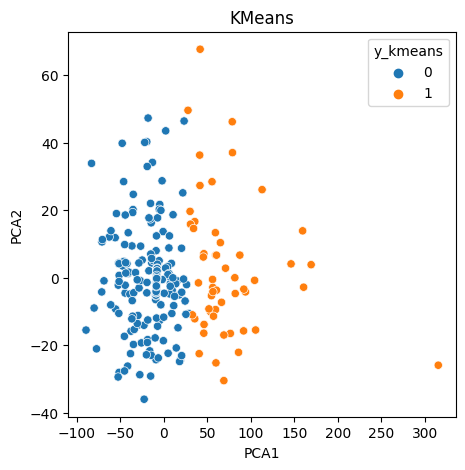

In [21]:
fig = plt.subplots(ncols=1, sharey=True, figsize=(5,5))
sns.scatterplot(x='PCA1', y='PCA2', data=dataset, hue='y_kmeans').set(title='KMeans')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

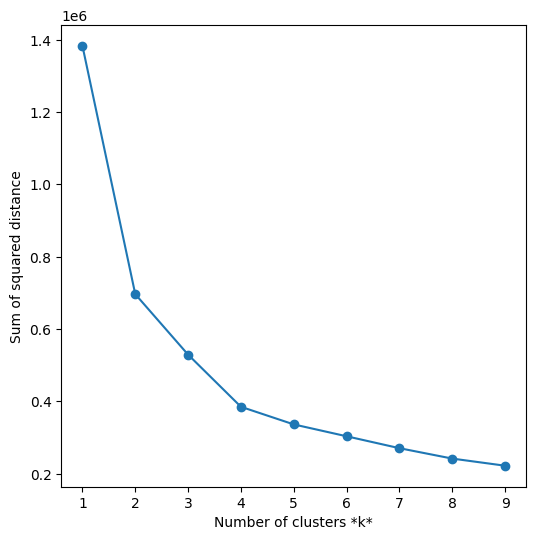

In [22]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

#** Decsison Tree and GaussianNB**

# Apply Under Sampling or Over Sampling
***`both applied and results in the report`***

In [23]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='not minority')
X, y = undersample.fit_resample(X, y)
dataset['Label'] = y
dataset['Label'].value_counts()

"""
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
dataset['Label'] = y
dataset['Label'].value_counts()
"""

"\nfrom imblearn.over_sampling import SMOTE\noversample = SMOTE()\nX, y = oversample.fit_resample(X, y)\ndataset['Label'] = y\ndataset['Label'].value_counts()\n"

In [24]:
#spliting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0, stratify = y)

In [25]:
# Train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

 #Calculate the accuracy, precision, and recall of the classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

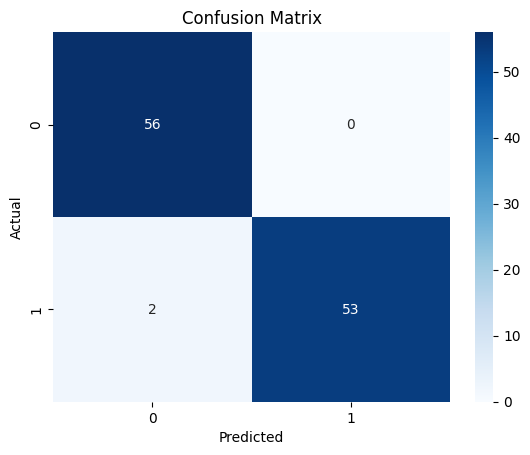

In [26]:
# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [27]:
print("Decision Tree Algorithm Performance results:")
print("Accuracy: ",accuracy )
print("Precision: ",precision)
print("Recall: ",recall)
print("F1-Score: ",f1)

Decision Tree Algorithm Performance results:
Accuracy:  0.9819819819819819
Precision:  1.0
Recall:  0.9636363636363636
F1-Score:  0.9814814814814815


In [28]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
model2 = GaussianNB()

# Model training
model2.fit(X_train, y_train)

# Predict Output
y_pred2 = model.predict(X_test)

#Calculate the accuracy, precision, and recall of the classifier
accuracy2 = accuracy_score(y_test, y_pred2)
precision2 = precision_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
f12 = f1_score(y_test, y_pred2)
confusion_mat2 = confusion_matrix(y_test, y_pred2)

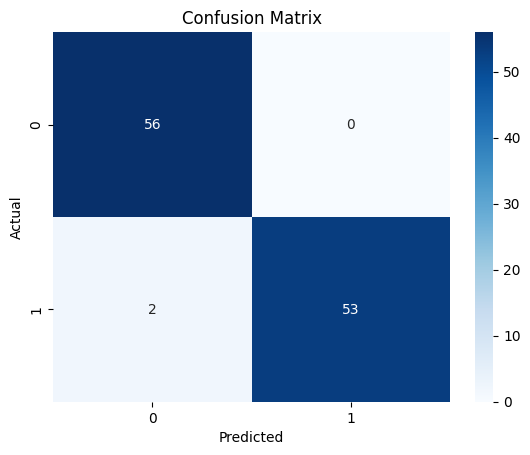

In [29]:
# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat2, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [30]:
print("GaussianNB Algorithm Performance results:")
print("Accuracy: ",accuracy2 )
print("Precision: ",precision2)
print("Recall: ",recall2)
print("F1-Score: ",f12)

GaussianNB Algorithm Performance results:
Accuracy:  0.9819819819819819
Precision:  1.0
Recall:  0.9636363636363636
F1-Score:  0.9814814814814815


# **Results of accuracy and other evaluation measures may differ from machine to machine.**

# ***Thank you.***